<h1 align='center'> Recommendation Engines</h1>

### It is too important for online businesses, beyond to understanding and segment the customer, which have almost no physical interaction with their customers. Recommendation engines provide wonderful opportunities to these organizations to not only understand their clientele but also to use that information to increase their revenues. Another important advantage, you can easily integrate a crude recommendation engine in its interaction with the users and then, on the basis of its performance, make the decision to develop a more sophisticated version. 
### Recommendation engines are a way of modeling and rearranging information available about user preferences and then using this information to provide informed recommendations on the basis of that information.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
import math as mt
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix
from scipy.stats import skew, norm, probplot
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')


### Load the Data into the Userdefined Variable

In [3]:
#Read userid-songid-freq triplets
song_df_1 = pd.read_csv('kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])

song_df_2 = pd.read_csv('unique_tracks.txt',sep='<SEP>',names = ['track_id','song_id','artist_name','release'])

song_df_2.drop_duplicates(subset ="song_id",keep = False,inplace = True)

##Merge the two dataframes above to create input dataframe for recommender systems
song_df = pd.merge(song_df_1,song_df_2,how = "left" )

### The below dataframe shows how many times a unique user listened to a particular song, as well as the details of the song.

In [4]:
song_df.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


### The Length of the Data

In [5]:
print("The Number of unique songs in the dataframe are ",len(song_df))

The Number of unique songs in the dataframe are  1450933


In [6]:
# Load the Data Set and MErge it
import pandas as pd
count_play_df = pd.read_csv('kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user','song','play_count'])
track_metadata_df = pd.read_csv('unique_tracks.txt',sep='<SEP>',names = ['title','song_id','artist_name','release'])

In [7]:
track_metadata_df.drop_duplicates(subset ="song_id",keep = False,inplace = True)

In [8]:
user_song_list_count = pd.merge(count_play_df, 
                                track_metadata_df, how='left', 
                                left_on='song', 
                                right_on='song_id')
user_song_list_count.rename(columns={'play_count':'listen_count'},inplace=True)
del(user_song_list_count['song_id'])

In [9]:
display(user_song_list_count.head())
user_song_list_count.listen_count.describe().reset_index().T

,user,song,listen_count,title,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
listen_count,1.45093e+06,3.18715,7.05166,1,1,1,3,923


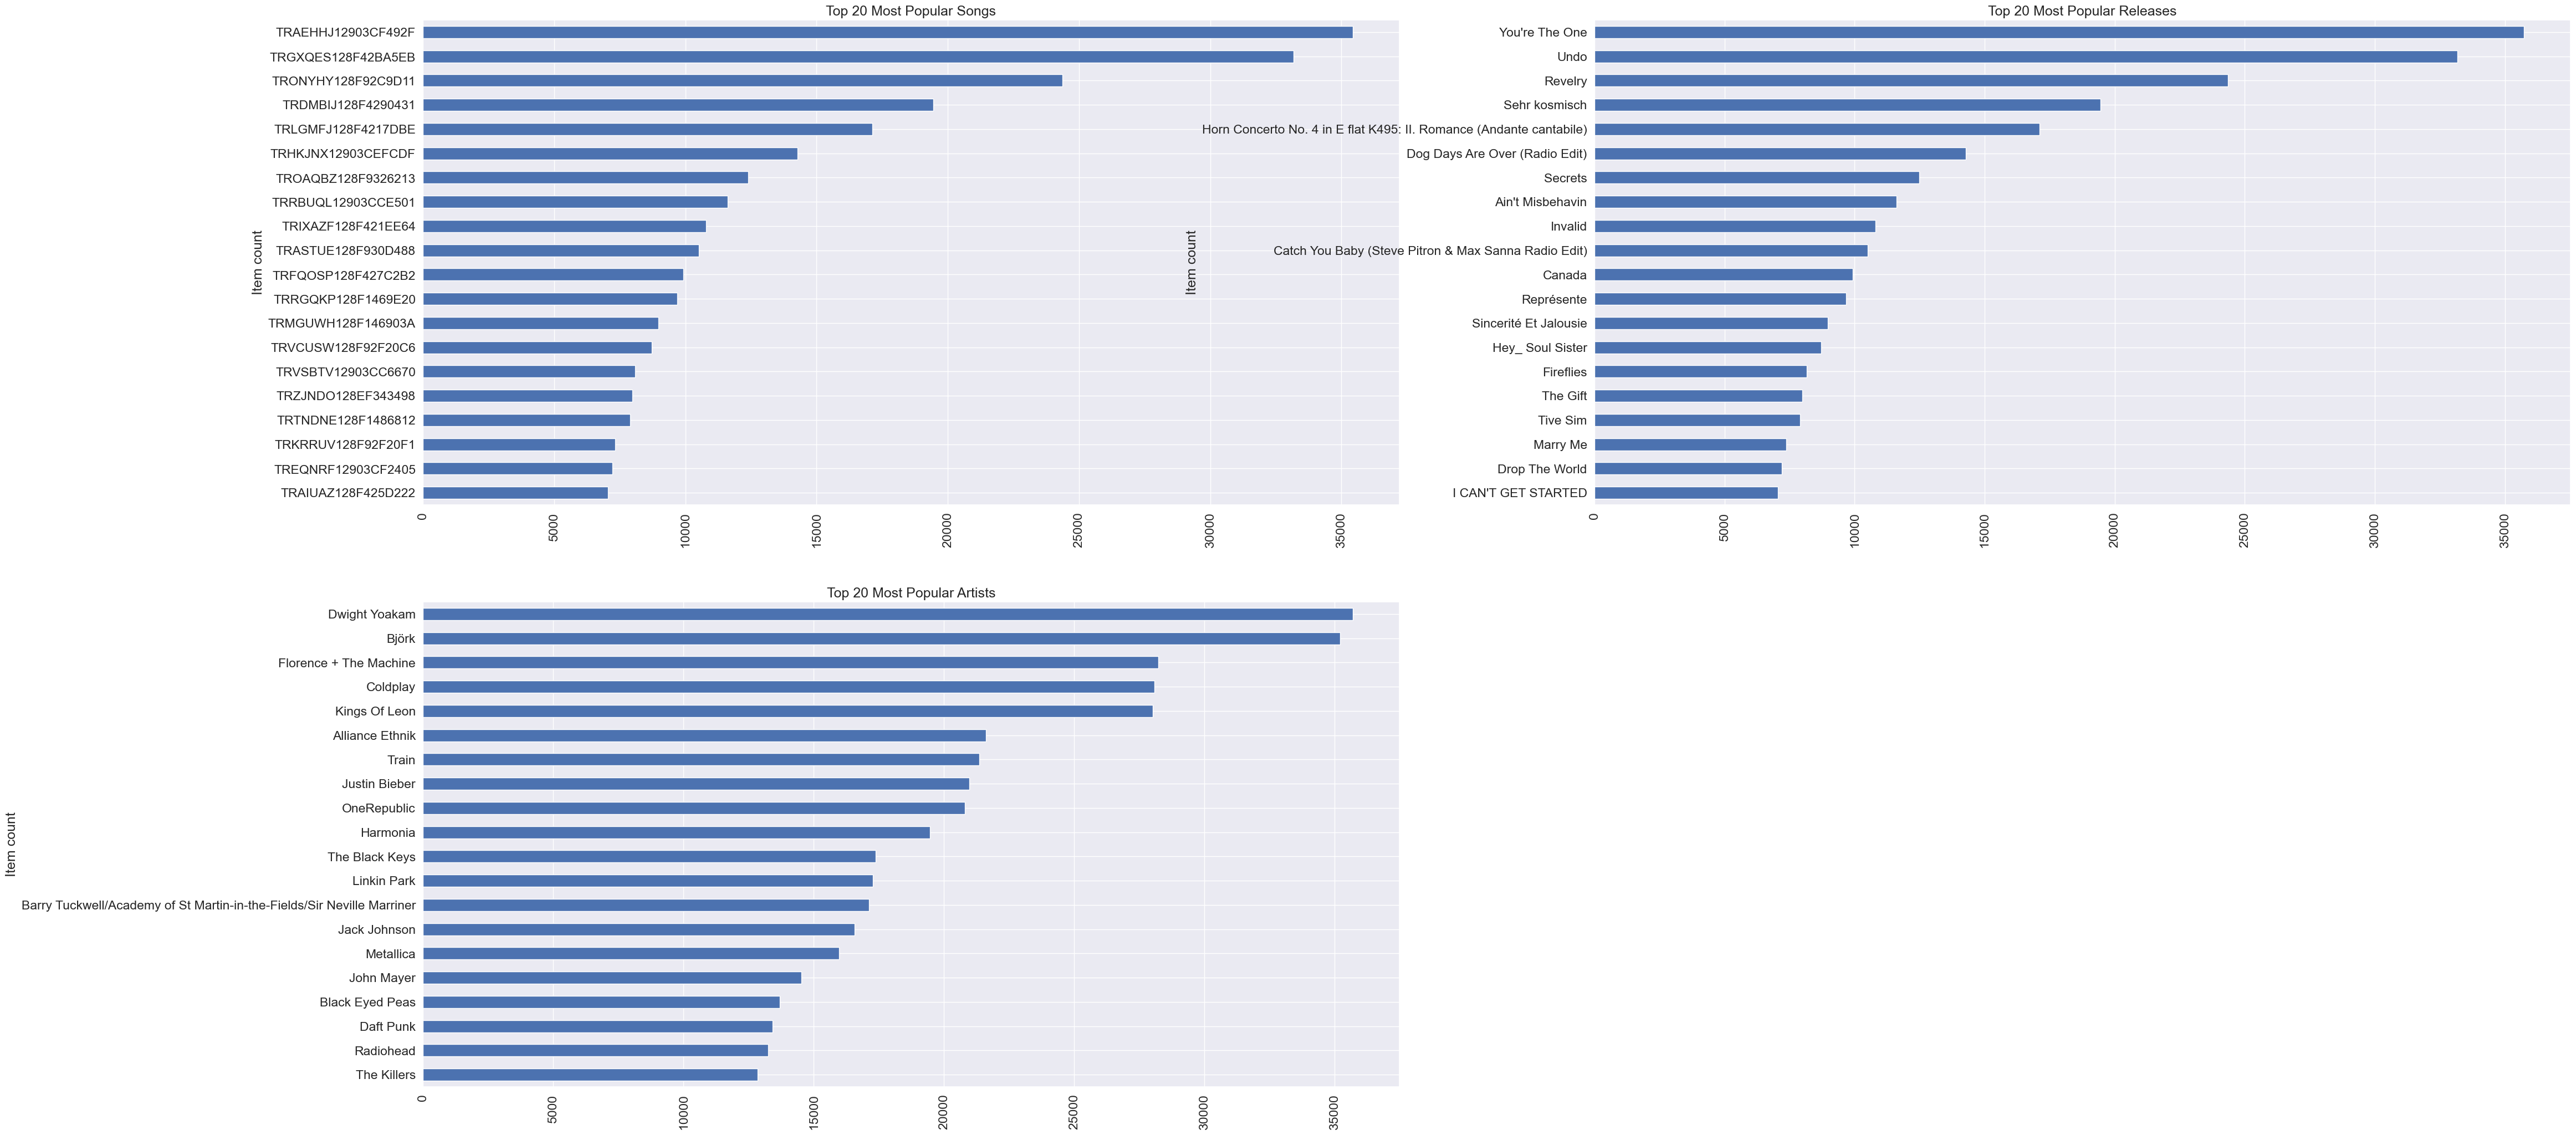

In [10]:
fig = plt.figure(figsize=(50, 25))
a1 = fig.add_subplot(221)
popular_songs = user_song_list_count[['title','listen_count']].groupby('title').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_songs.plot(kind='barh', title='Top 20 Most Popular Songs', legend=False, ax=a1)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a2 = fig.add_subplot(222)
popular_release = user_song_list_count[['release','listen_count']].groupby('release').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f2 = popular_release.plot(kind='barh', title='Top 20 Most Popular Releases', legend=False, ax=a2)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a3 = fig.add_subplot(223)
popular_artist = user_song_list_count[['artist_name','listen_count']].groupby('artist_name').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_artist.plot(kind='barh', title='Top 20 Most Popular Artists', legend=False, ax=a3)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

plt.show()

### So the two most obsessed fans did not influence any of the top 20.Let's take a look at the distribution of how many different songs each user listens to, first we create a summary dataset and next a function to help us with better visualization.

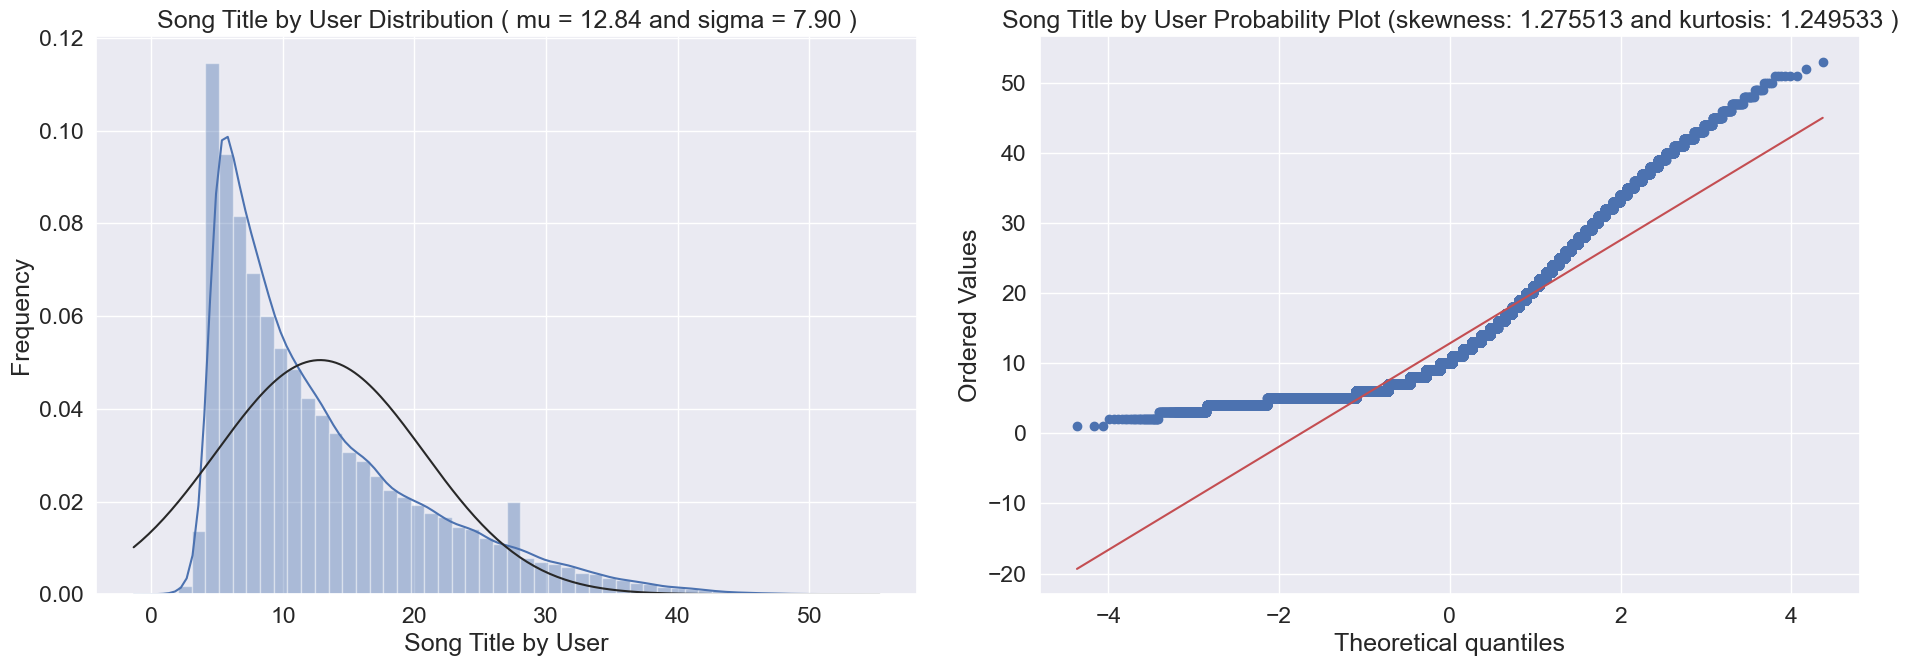

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
title,110000,12.8357,7.90037,1,7,10,17,53


In [11]:
user_song_count_distribution = user_song_list_count[['user','title']].groupby('user').count().\
                                reset_index().sort_values(by='title',ascending = False)

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(user_song_count_distribution.title, 'Song Title by User')
user_song_count_distribution.title.describe().reset_index().T

### From the first graph above we can see that song title by user distribution is skewed, has a peak on the left and a long tail to the right. It deviates from normal distribution and is positively biased.. As we expect, less than a hundred listen a good number of different songs, but enough to raise the average to above 26.

#### From the Probability Plot, we could see that song title by user also does not align with the diagonal red line which represent normal distribution. The form of its distribution confirm that is a skewed right.

####  With skewness positive of 4.2, we confirm the lack of symmetry and indicate that song title by user are skewed right, as we can see too at the song title by user distribution plot, skewed right means that the right tail is long relative to the left tail, as we expect in counts. The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

####  Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers, and positive kurtosis indicates a heavy-tailed distribution and negative kurtosis indicates a light tailed distribution. So, with 32.6 of positive kurtosis song title by user are heavy-tailed and definitely has outliers.

####  OK, let's take a look at the distribution of the number of times users heard the most popular song.

### First we create subset of the dataset

In [12]:
song_df = song_df.head(10000)

#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['release'].map(str) + " - " + song_df['artist_name']

### The Most popular songs in data set 

In [13]:
song_grouped = song_df.groupby(['song']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'song'], ascending = [0,1])

,song,freq,percentage
7195,You're The One - Dwight Yoakam,40,0.410088
6602,Undo - Björk,38,0.389584
5160,Sehr kosmisch - Harmonia,36,0.369079
4882,Revelry - Kings Of Leon,32,0.328071
1490,Dog Days Are Over (Radio Edit) - Florence + Th...,29,0.297314
...,...,...,...
7260,Árboles de la barranca - Carlos Y Jose,1,0.010252
7261,Ännu En Dag - Drifters,1,0.010252
7262,Ça Marche - Christophe Maé,1,0.010252
7263,Örökké Tart - Tankcsapda,1,0.010252


#### Second we have to count number of unique users in the data set

In [14]:
users = song_df['user_id'].unique()
print("The unique users in the data set is ",len(users))

The unique users in the data set is  753


### Third we have to count number of unique songs in the dataset

In [15]:
songs = song_df['song'].unique()
print("The unique songs present in the data set is ",len(songs))

The unique songs present in the data set is  7266


## Create Class for Popularity based Recommender System model

In [16]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations
    

#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
    
        user_songs = self.get_user_items(user) #A. Get all unique songs for this user    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
    
        all_songs = self.get_all_items_train_data()  #B. Get all unique items (songs) in the training data
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

# Song Recommender <br>

# Split train test 

In [17]:
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))

                                       user_id             song_id  freq  \
7389  d3c75a5a579f29a3a853b3a4ba76d3a2e5243655  SOQTHZW12A8C1400F8     2   
9275  3071be7411e636fcda6c99277a5b51c45a7c4866  SODQPTQ12AF72A64BC     6   
2995  1fa6a4add6eacc3ce1aec44fc37037db2b09bf82  SOUCBEB12A6310E1F9     3   
5316  c8db3788ca8f60d92abf827ad59f424f05897cfc  SOBWFXM12AB0182808    14   
356   6530c4fc41b9110de5d39fe0355fa103c66385f0  SOSIZFO12A58A79934     2   

                track_id               artist_name  \
7389  TRGVRBA128F428E872  CCCP - Fedeli Alla Linea   
9275  TRGAXFP128F428DE85            The Budos Band   
2995  TRSTLSG128E078370C                Kanye West   
5316  TREYVKJ128F931E1B0             Alexi Murdoch   
356   TRYZCJM12903CE0758                   Vicious   

                                   release  \
7389  Aghia Sophia (2008 Digital Remaster)   
9275                              Scorpion   
2995                           Jesus Walks   
5316                            Or

### WE have create Instance of the popularity_recommender_py() Class (MODEL)

In [18]:
pm = popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

### By using Popularity Model make some predictions

In [19]:
user_id = users[5]
pm.recommend(user_id)

,user_id,song,score,Rank
5944,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,You're The One - Dwight Yoakam,34,1.0
5451,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Undo - Björk,31,2.0
4268,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Sehr kosmisch - Harmonia,30,3.0
1239,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Dog Days Are Over (Radio Edit) - Florence + Th...,24,4.0
4046,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Revelry - Kings Of Leon,23,5.0
1637,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Fireflies - Charttraxx Karaoke,19,6.0
1339,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Drop The World - Lil Wayne / Eminem,18,7.0
2172,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Horn Concerto No. 4 in E flat K495: II. Romanc...,17,8.0
4036,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Représente - Alliance Ethnik,17,9.0
4260,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Secrets - OneRepublic,16,10.0


### Point 1--->  Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [20]:
user_id = users[8]
pm.recommend(user_id)

,user_id,song,score,Rank
5944,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,You're The One - Dwight Yoakam,34,1.0
5451,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Undo - Björk,31,2.0
4268,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Sehr kosmisch - Harmonia,30,3.0
1239,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Dog Days Are Over (Radio Edit) - Florence + Th...,24,4.0
4046,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Revelry - Kings Of Leon,23,5.0
1637,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Fireflies - Charttraxx Karaoke,19,6.0
1339,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Drop The World - Lil Wayne / Eminem,18,7.0
2172,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Horn Concerto No. 4 in E flat K495: II. Romanc...,17,8.0
4036,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Représente - Alliance Ethnik,17,9.0
4260,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Secrets - OneRepublic,16,10.0


<h1 align='center'> Collaborative filtering model</h1>

# creating an  model that allows us to make personalized recommendations to each user.

## Creating an instance of item similarity based recommender class

In [21]:
is_model = item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

## Using the personalized model to make some song recommendations

In [22]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62:
------------------------------------------------------------------------------------
Un Simple Histoire - Thievery Corporation
Passacaglia - Secret Garden
The Richest Man In Babylon - Thievery Corporation
Pastorale - Secret Garden
Until The Morning - Thievery Corporation
Kryptonite - 3 Doors Down
Illumination - Secret Garden
Love Letters - Dario Marianelli
In The Waiting Line - Zero 7
Big Yellow Taxi - Counting Crows / Vanessa Carlton
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 10
no. of unique songs in the training set: 6000
Non zero values in cooccurence_matrix :202


,user_id,song,score,rank
0,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Shakedown - Au Pairs,0.033333,1
1,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,S-Bahn-Surfen (2007 Digital Remaster) - Spider...,0.033333,2
2,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Attack Of The Killerbirds - Emilie Simon,0.033333,3
3,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Hate (I Really Don't Like You) - Plain White T's,0.033333,4
4,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Ike's Mood - Isaac Hayes,0.033333,5
5,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Dancing In The Moonlight (It's Caught Me In It...,0.033333,6
6,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Rock Climbing [Byte 1] (2005) - Damu The Fudge...,0.033333,7
7,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Frantic - The Lovely Feathers,0.033333,8
8,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,La Femme Parallel - Thievery Corporation,0.033333,9
9,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,It Had To Be You (Cd) - Motion City Soundtrack,0.033333,10


## Step 2 - Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [23]:
user_id = users[7]

user_items = is_model.get_user_items(user_id)

print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: c34670d9c1718361feb93068a853cead3c95b76a:
------------------------------------------------------------------------------------
Undo - Björk
Ain't Misbehavin - Sam Cooke
You're The One - Dwight Yoakam
Secrets - OneRepublic
Creep (Explicit) - Radiohead
nan
Quiero Verte Sonreir - Carlos Vives
In The End (Album Version) - Linkin Park
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 8
no. of unique songs in the training set: 6000
Non zero values in cooccurence_matrix :1093


,user_id,song,score,rank
0,c34670d9c1718361feb93068a853cead3c95b76a,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.043123,1
1,c34670d9c1718361feb93068a853cead3c95b76a,Livin' On A Prayer - Bon Jovi,0.042873,2
2,c34670d9c1718361feb93068a853cead3c95b76a,Cuando los ángeles lloran - Maná,0.041667,3
3,c34670d9c1718361feb93068a853cead3c95b76a,Quiereme Siempre - Sonora Carruseles,0.041667,4
4,c34670d9c1718361feb93068a853cead3c95b76a,Dieu M'a Donn? La Foi - Ophelie Winter,0.041667,5
5,c34670d9c1718361feb93068a853cead3c95b76a,Cling And Clatter - Lifehouse,0.041667,6
6,c34670d9c1718361feb93068a853cead3c95b76a,Rebelion - Joe Arroyo,0.041667,7
7,c34670d9c1718361feb93068a853cead3c95b76a,La Valse D'Amélie (Version Piano) - Yann Tiersen,0.041667,8
8,c34670d9c1718361feb93068a853cead3c95b76a,Le Toi Du Moi - Carla Bruni,0.041667,9
9,c34670d9c1718361feb93068a853cead3c95b76a,Lumière - Camille,0.041667,10


### We can also apply the model to find similar songs to any song in the dataset

In [24]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

no. of unique songs in the training set: 6000
Non zero values in cooccurence_matrix :56


,user_id,song,score,rank
0,,Stuck In The Moment - Justin Bieber,0.4,1
1,,EMOTIONS - Mariah Carey,0.2,2
2,,Rang De Basanti - Daler Mehndi;Chitra,0.2,3
3,,Praise You In This Storm (Medium w/o backgroun...,0.2,4
4,,Grace Kelly - MIKA,0.2,5
5,,Try Sleeping With A Broken Heart - Alicia Keys,0.2,6
6,,This Time Around - Hanson,0.2,7
7,,Blues By The Hour - Lil' Son Jackson,0.2,8
8,,Unfold (Eagles Ballroom Live Version) - Jason ...,0.2,9
9,,Piano & I - Alicia Keys,0.2,10


## Step 4 - Use the personalized recommender model to get similar songs for the following song.

In [25]:
song = 'Yellow - Coldplay'
is_model.get_similar_items([song])

no. of unique songs in the training set: 6000
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,Fall Line - Jack Johnson,0.0,1
1,,Please Do Not Let Me Go - Ryan Adams,0.0,2
2,,The Girl You Lost (Sander van Doorn Edit) - Sia,0.0,3
3,,Ella Elle L A - Kate Ryan,0.0,4
4,,I Only Think Of You - The Horrors,0.0,5
5,,Time After Time - Everything But The Girl,0.0,6
6,,Love - Sugarland,0.0,7
7,,Cute Without The E (cut From The Team) (Album ...,0.0,8
8,,On Your Way - The Album Leaf,0.0,9
9,,Nothing Is Promised feat. Yung Joc (Amended Al...,0.0,10


In [26]:
song = 'Ella Elle L A - Kate Ryan'
is_model.get_similar_items([song])

no. of unique songs in the training set: 6000
Non zero values in cooccurence_matrix :11


,user_id,song,score,rank
0,,Ven Damelo - Daddy Yankee,1.000000,1
1,,El Tlatoani del barrio - Café Tacvba,1.000000,2
2,,Blasé Blasé - SNAP!,1.000000,3
3,,Sacred Flame - Carnal Forge,1.000000,4
4,,Y solo se me ocurre amarte (Unplugged) - Aleja...,1.000000,5
5,,Frente A Frente - Bunbury,1.000000,6
6,,Canción Optimista - Chetes,1.000000,7
7,,Ahora - Chetes,1.000000,8
8,,Running Away - Kevin Blechdom,0.500000,9
9,,Unite (2009 Digital Remaster) - Beastie Boys,0.166667,10


### Evaluation Model Class

In [27]:
#Class to calculate precision and recall

import random

class precision_recall_calculator():
    
    def __init__(self, test_data, train_data, pm, is_model):
        self.test_data = test_data
        self.train_data = train_data
        self.user_test_sample = None
        self.model1 = pm
        self.model2 = is_model
        
        self.ism_training_dict = dict()
        self.pm_training_dict = dict()
        self.test_dict = dict()
    
    #Method to return random percentage of values from a list
    def remove_percentage(self, list_a, percentage):
        k = int(len(list_a) * percentage)
        random.seed(0)
        indicies = random.sample(range(len(list_a)), k)
        new_list = [list_a[i] for i in indicies]
    
        return new_list
    
    #Create a test sample of users for use in calculating precision
    #and recall
    def create_user_test_sample(self, percentage):
        #Find users common between training and test set
        users_test_and_training = list(set(self.test_data['user_id'].unique()).intersection(set(self.train_data['user_id'].unique())))
        print("Length of user_test_and_training:%d" % len(users_test_and_training))

        #Take only random user_sample of users for evaluations
        self.users_test_sample = self.remove_percentage(users_test_and_training, percentage)

        print("Length of user sample:%d" % len(self.users_test_sample))
        
    #Method to generate recommendations for users in the user test sample
    def get_test_sample_recommendations(self):
        #For these test_sample users, get top 10 recommendations from training set
        #self.ism_training_dict = {}
        #self.pm_training_dict = {}

        #self.test_dict = {}

        for user_id in self.users_test_sample:
            #Get items for user_id from item similarity model
            print("Getting recommendations for user:%s" % user_id)
            user_sim_items = self.model2.recommend(user_id)
            self.ism_training_dict[user_id] = list(user_sim_items["song"])
    
            #Get items for user_id from popularity model
            user_sim_items = self.model1.recommend(user_id)
            self.pm_training_dict[user_id] = list(user_sim_items["song"])
    
            #Get items for user_id from test_data
            test_data_user = self.test_data[self.test_data['user_id'] == user_id]
            self.test_dict[user_id] = set(test_data_user['song'].unique() )
    
    #Method to calculate the precision and recall measures
    def calculate_precision_recall(self):
        #Create cutoff list for precision and recall calculation
        cutoff_list = list(range(1,11))


        #For each distinct cutoff:
        #    1. For each distinct user, calculate precision and recall.
        #    2. Calculate average precision and recall.

        ism_avg_precision_list = []
        ism_avg_recall_list = []
        pm_avg_precision_list = []
        pm_avg_recall_list = []


        num_users_sample = len(self.users_test_sample)
        for N in cutoff_list:
            ism_sum_precision = 0
            ism_sum_recall = 0
            pm_sum_precision = 0
            pm_sum_recall = 0
            ism_avg_precision = 0
            ism_avg_recall = 0
            pm_avg_precision = 0
            pm_avg_recall = 0

            for user_id in self.users_test_sample:
                ism_hitset = self.test_dict[user_id].intersection(set(self.ism_training_dict[user_id][0:N]))
                pm_hitset = self.test_dict[user_id].intersection(set(self.pm_training_dict[user_id][0:N]))
                testset = self.test_dict[user_id]
        
                pm_sum_precision += float(len(pm_hitset))/float(N)
                pm_sum_recall += float(len(pm_hitset))/float(len(testset))

                ism_sum_precision += float(len(ism_hitset))/float(len(testset))
                ism_sum_recall += float(len(ism_hitset))/float(N)
        
            pm_avg_precision = pm_sum_precision/float(num_users_sample)
            pm_avg_recall = pm_sum_recall/float(num_users_sample)
    
            ism_avg_precision = ism_sum_precision/float(num_users_sample)
            ism_avg_recall = ism_sum_recall/float(num_users_sample)

            ism_avg_precision_list.append(ism_avg_precision)
            ism_avg_recall_list.append(ism_avg_recall)
    
            pm_avg_precision_list.append(pm_avg_precision)
            pm_avg_recall_list.append(pm_avg_recall)
            
        return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)
     

    #A wrapper method to calculate all the evaluation measures
    def calculate_measures(self, percentage):
        #Create a test sample of users
        self.create_user_test_sample(percentage)
        
        #Generate recommendations for the test sample users
        self.get_test_sample_recommendations()
        
        #Calculate precision and recall at different cutoff values
        #for popularity mode (pm) as well as item similarity model (ism)
        
        return self.calculate_precision_recall()
        #return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)  

### Comparison between the models
#### We now formally compare the popularity and the personalized models.

#### We use the precision recall calculator class to calculate the evaluation measures

In [28]:

start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:664
Length of user sample:33
Getting recommendations for user:b8ce859be8f6dda3963256ec99b028f1b53d0379
No. of unique songs for the user: 3
no. of unique songs in the training set: 6000
Non zero values in cooccurence_matrix :54
Getting recommendations for user:350c1b37d7f71de913783f47c38a9f50d3dd9592
No. of unique songs for the user: 18
no. of unique songs in the training set: 6000
Non zero values in cooccurence_matrix :360
Getting recommendations for user:44cf16a786908ff8bea0d7f7dfce57cdf2e718f3
No. of unique songs for the user: 14
no. of unique songs in the training set: 6000
Non zero values in cooccurence_matrix :334
Getting recommendations for user:819549100bbfe1c648d7a29c78252ff59e7f3973
No. of unique songs for the user: 16
no. of unique songs in the training set: 6000
Non zero values in cooccurence_matrix :892
Getting recommendations for user:74df1b97bf59f0fbcf1905d0d671d5dc6187acf4
No. of unique songs for the user: 5
no. of unique songs in the tra

### plot precision recall curve

In [29]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


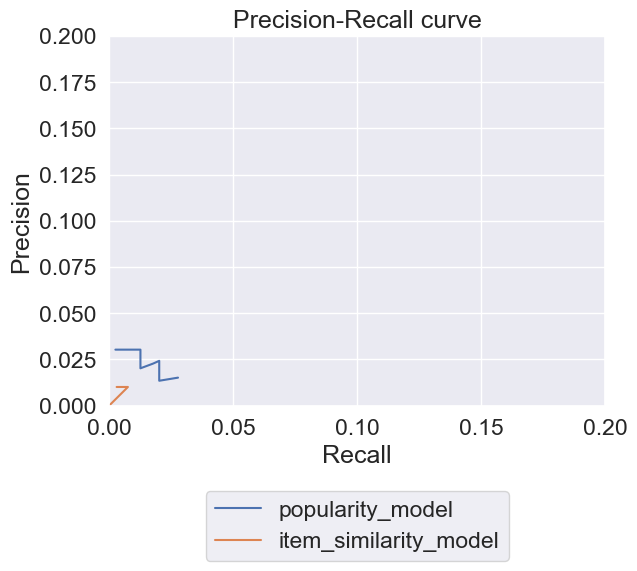

In [30]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

## SVD (Singular Value Decomposition) Based REcommender System 

### Using SVD matrix factorization based collaborative filtering recommender system

#### The following code implements a Singular Value Decomposition (SVD) based matrix factorization collaborative filtering recommender system. The user ratings matrix used is a small matrix as follows: Item0 Item1 Item2 Item3 User0 3 1 2 3 User1 4 3 4 3 User2 3 2 1 5 User3 1 6 5 2 User4 0 0 5 0 As we can see in the above matrix, all users except user 4 rate all items. The code calculates predicted recommendations for user 4.

#### Import Required Libraries 

In [31]:
!pip install scipy
!pip install cython
!pip install sparsesvd

In [32]:
import math as mt
import csv
from sparsesvd import sparsesvd #used for matrix factorization
import numpy as np
from scipy.sparse import csc_matrix #used for sparse matrix
from scipy.sparse.linalg import * #used for matrix multiplication

#### Methods to compute SVD and recommendations

In [33]:
#constants defining the dimensions of our User Rating Matrix (URM)
MAX_PID = 4
MAX_UID = 5

#Compute SVD of the user ratings matrix
def computeSVD(urm, K):
    U, s, Vt = sparsesvd(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(np.transpose(U), dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

#Compute estimated rating for the test user
def computeEstimatedRatings(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 

    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        #we convert the vector to dense format in order to get the indices 
        #of the movies with the best estimated ratings 
        estimatedRatings[userTest, :] = prod.todense()
        recom = (-estimatedRatings[userTest, :]).argsort()[:250]
    return recom

#### Use SVD to make predictions for a test user id

In [34]:
#Used in SVD calculation (number of latent factors)
K=2

#Initialize a sample user rating matrix
urm = np.array([[3, 1, 2, 3],[4, 3, 4, 3],[3, 2, 1, 5], [1, 6, 5, 2], [5, 0,0 , 0]])
urm = csc_matrix(urm, dtype=np.float32)

#Compute SVD of the input user ratings matrix
U, S, Vt = computeSVD(urm, K)

#Test user set as user_id 4 with ratings [0, 0, 5, 0]
uTest = [4]
print("User id for whom recommendations are needed: %d" % uTest[0])

#Get estimated rating for test user
print("Predictied ratings:")
uTest_recommended_items = computeEstimatedRatings(urm, U, S, Vt, uTest, K, True)
print(uTest_recommended_items)

User id for whom recommendations are needed: 4
Predictied ratings:
[0 3 2 1]


#### Understanding Intuition behind SVD

#### SVD result gives three matrices as output: U, S and Vt (T in Vt means transpose). Matrix U represents user vectors and Matrix Vt represents item vectors. In simple terms, U represents users as 2 dimensional points in the latent vector space, and Vt represents items as 2 dimensional points in the same space. Next, we print the matrices U, S and Vt and try to interpret them. Think how the points for users and items will look like in a 2 dimensional axis. For example, the following code plots all user vectors from the matrix U in the 2 dimensional space. Similarly, we plot all the item vectors in the same plot from the matrix Vt.

Matrix Dimensions for U
(5, 2)


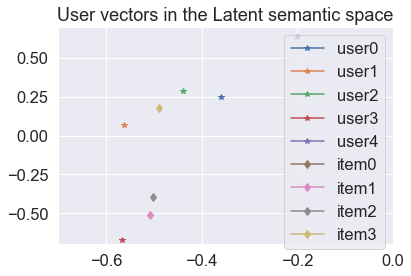

In [35]:
%matplotlib inline
from pylab import *

#Plot all the users
print("Matrix Dimensions for U")
print(U.shape)

for i in range(0, U.shape[0]):
    plot(U[i,0], U[i,1], marker = "*", label="user"+str(i))

for j in range(0, Vt.T.shape[0]):
    plot(Vt.T[j,0], Vt.T[j,1], marker = 'd', label="item"+str(j))    
    
legend(loc="upper right")
title('User vectors in the Latent semantic space')
ylim([-0.7, 0.7])
xlim([-0.7, 0])
show()